In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from xgboost import XGBClassifier
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import math as mt
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, matthews_corrcoef
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
import smote_variants as sv
import sklearn.datasets as datasets
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
import logging
logging.getLogger('smote_variants').setLevel(logging.CRITICAL)
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

Upload CSV file in colab


Read CSV File

In [3]:
df=pd.read_csv(r"C:\Users\tatha\Downloads\survey_lung_cancer.csv");

In [4]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


In [5]:
df1=df.copy()

Replace missing value using null & count null value

In [6]:
df1 = df.copy()
df1.replace('?', np.nan, inplace=True)
count_null = (df1 == '?').sum()
print(count_null.sum())

0


Check number of null values

In [7]:
df1.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

Drop null values row

In [8]:
#df1 = df1.drop('Unnamed: 32', axis = 1)

Reset indexing

In [9]:
df1.reset_index(drop=True, inplace=True)

Drop ID

In [10]:
#df1 = df1.drop('id', axis=1)

In [11]:
df1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,MALE,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,MALE,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,FEMALE,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,MALE,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,FEMALE,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,FEMALE,56,0,0,0,1,1,1,0,0,1,1,1,1,0,YES
305,MALE,70,1,0,0,0,0,1,1,1,1,1,1,0,1,YES
306,MALE,58,1,0,0,0,0,0,1,1,1,1,0,0,1,YES
307,MALE,67,1,0,1,0,0,1,1,0,1,1,1,0,1,YES


Information about the dataset

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

Describe about the dataset

In [13]:
df1.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of object and there position

In [14]:
counts = df1['LUNG_CANCER'].value_counts()
print(counts)

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64


Level Encoding


In [15]:
label_encoder = LabelEncoder()
df1['LUNG_CANCER'] = label_encoder.fit_transform(df1['LUNG_CANCER'])
df1['GENDER'] = label_encoder.fit_transform(df1['GENDER'])

In [16]:
df1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


Check for level encoding

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [18]:
corr_matrix = df1.corr()

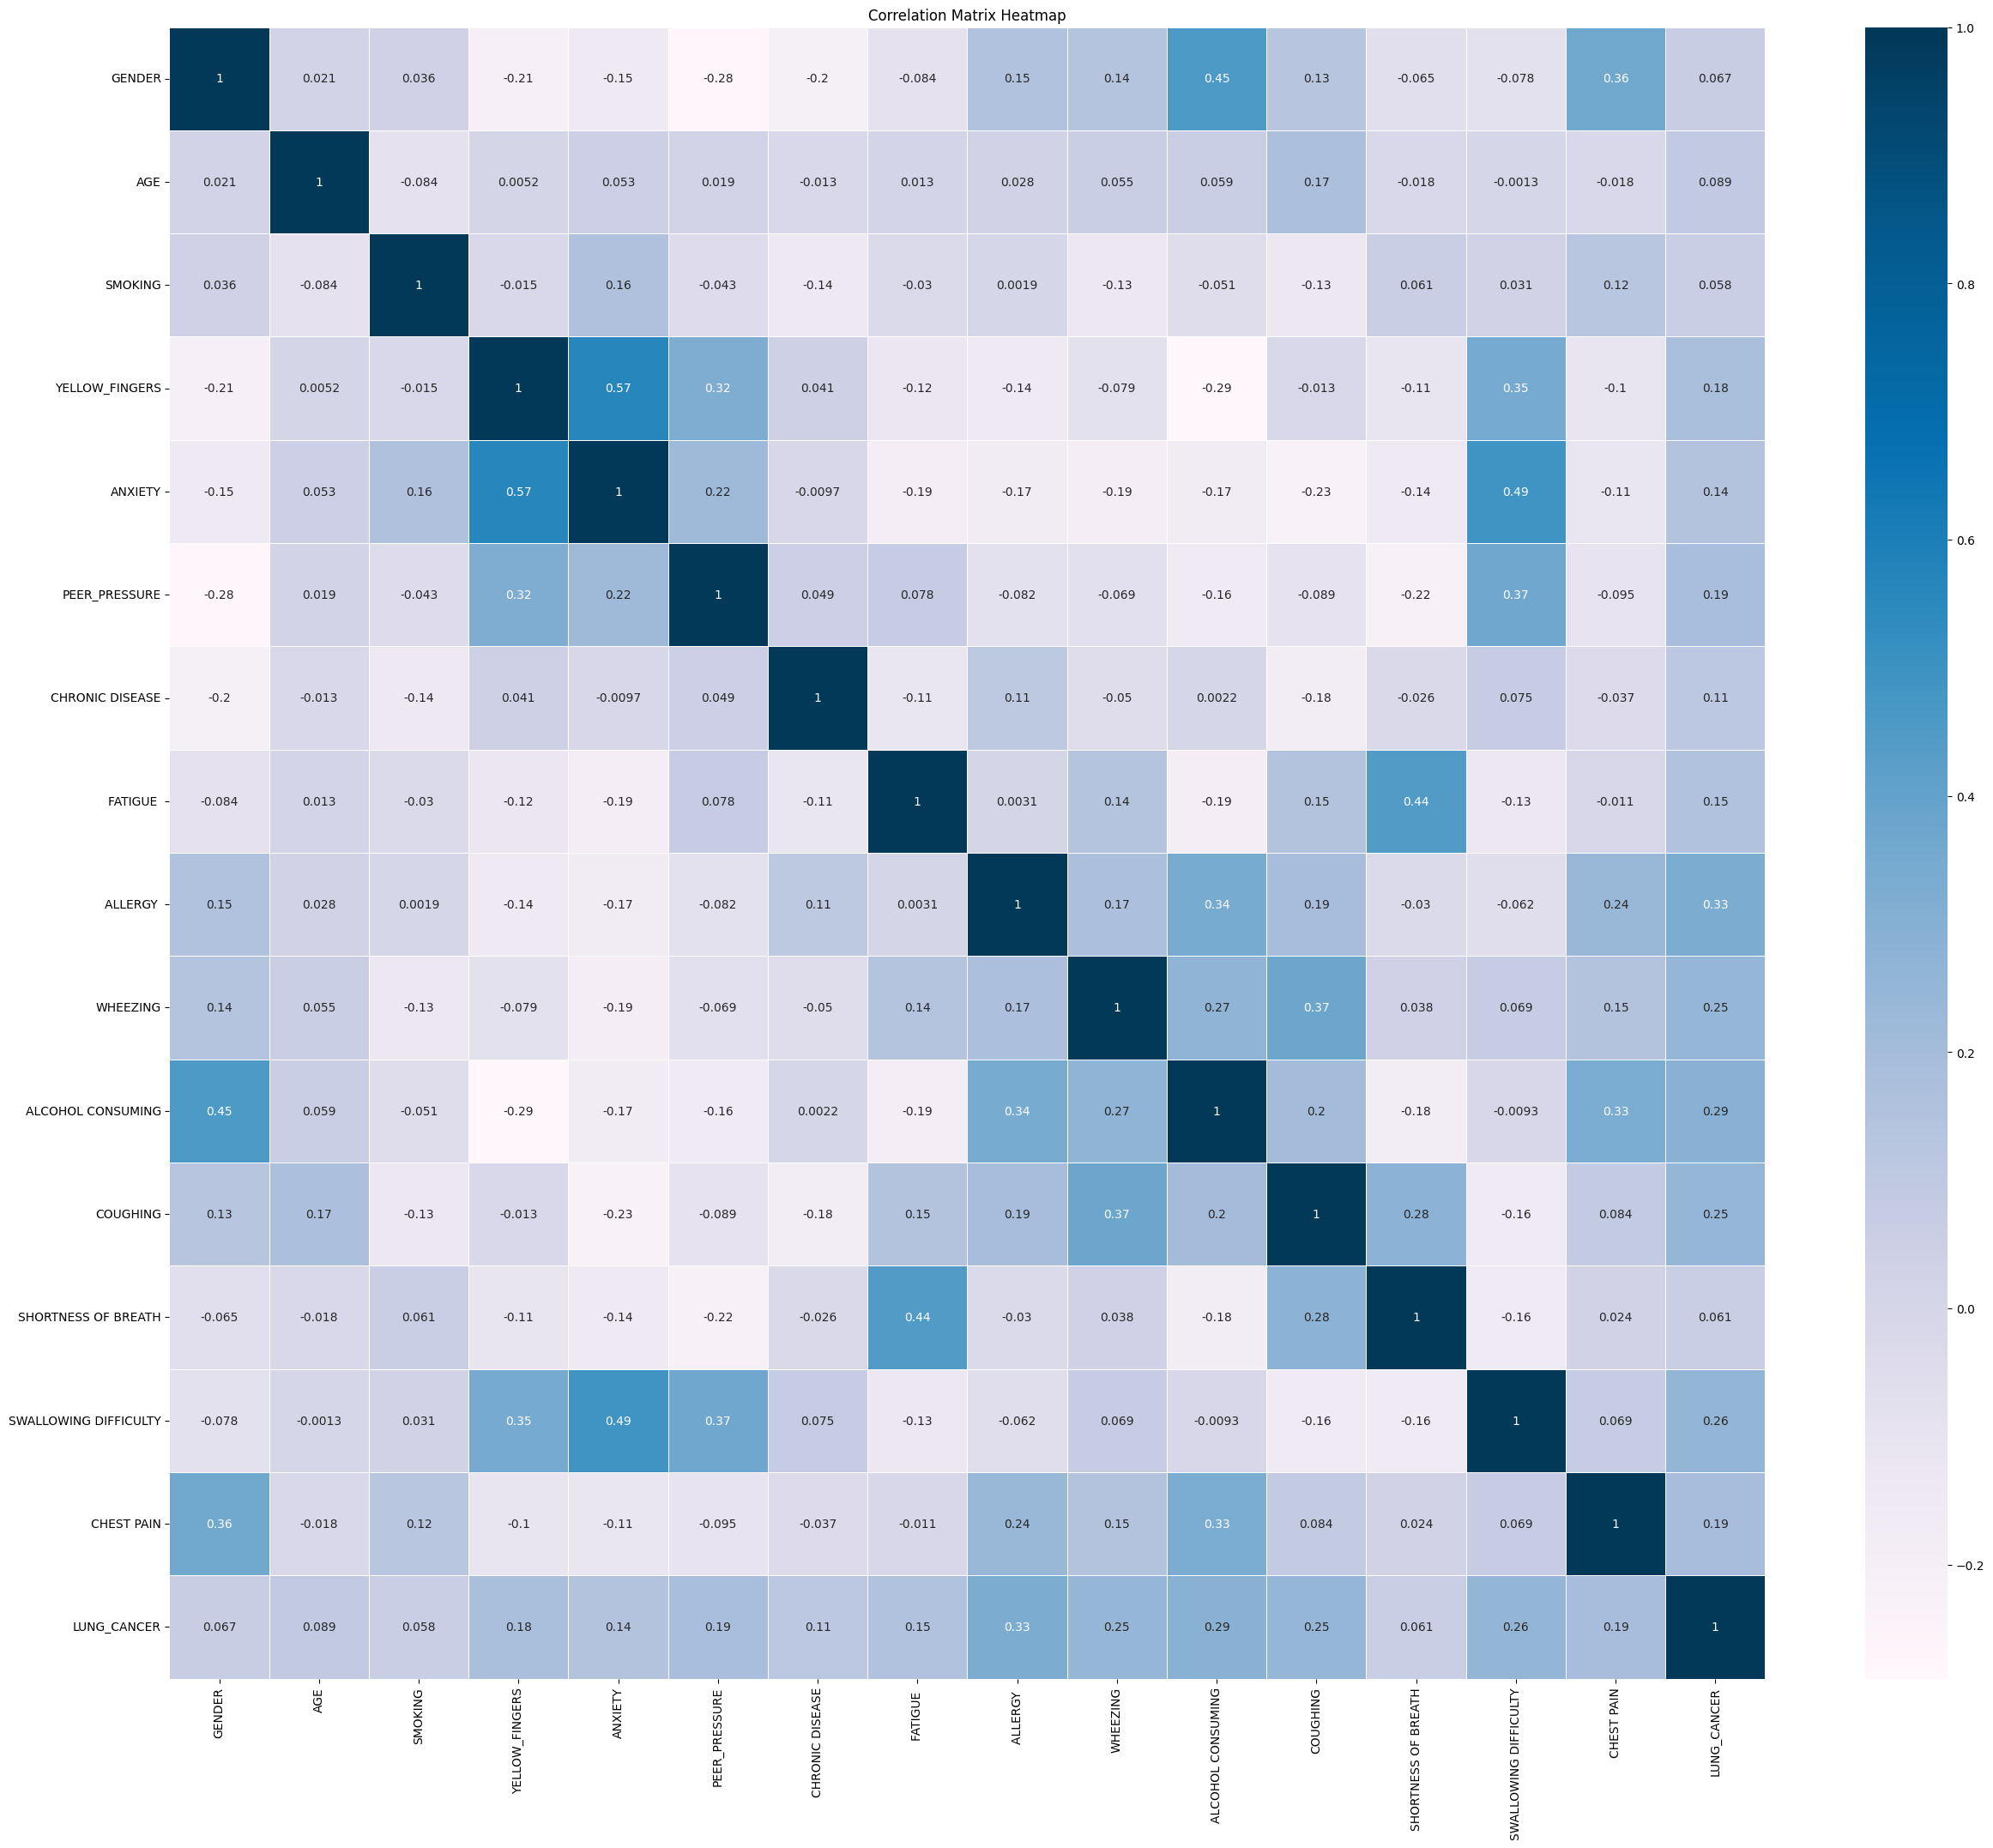

In [19]:
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, cmap='PuBu', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Split the dataset into training and testing sets

In [20]:
X= df1.drop('LUNG_CANCER', axis=1)
y= df1['LUNG_CANCER']

In [21]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1


In [22]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

In [23]:
counts = df1['LUNG_CANCER'].value_counts()
print(counts)

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64


In [24]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

In [25]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1


In [26]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

SCV Base Model

In [26]:
base_estimator=DecisionTreeClassifier()
base_estimator2=LogisticRegression()

clf = [
    LogisticRegression(),
    SVC(kernel="linear", probability=True, random_state=42),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    AdaBoostClassifier(n_estimators=50),
    GradientBoostingClassifier(random_state=42),
    LGBMClassifier(),
    ExtraTreesClassifier(n_estimators=100, random_state=0),
    RandomForestClassifier(n_estimators=100, random_state=42),
    XGBClassifier(n_estimators=100),
    GaussianNB(),
    CatBoostClassifier(random_state=42),
    BaggingClassifier(base_estimator, n_estimators=50, random_state=42), 
    BaggingClassifier(base_estimator2, n_estimators=50, random_state=42)
]

results_data = []
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for model in clf:
    model_results = {"Classifier": type(model).__name__}

    accuracies = []
    spec = []
    mcc = []
    ck = []
    f1 = []
    pr = []
    re = []
    gmean = []
    roc_auc = []

    for train_index, test_index in cv.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        #X_train, X_test = X[train_index], X[test_index]
        #y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
        cm = confusion_matrix(y_test, y_pred)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]
        sp = tn / (tn + fp)
        spec.append(sp)
        Pre = tp / (tp + fp)
        pr.append(Pre)
        Rec = tp / (tp + fn)
        re.append(Rec)
        gm = mt.sqrt(sp * Rec)
        gmean.append(gm)
        m = matthews_corrcoef(y_test, y_pred)
        mcc.append(m)
        c = cohen_kappa_score(y_test, y_pred)
        ck.append(c)
        f = f1_score(y_test, y_pred)
        f1.append(f)
        roc = roc_auc_score(y_test, y_pred)
        roc_auc.append(roc)

    model_results["Accuracy"] = np.mean(accuracies) * 100
    model_results["Specificity"] = np.mean(spec) * 100
    model_results["MCC"] = np.mean(mcc) * 100
    model_results["Cohen's Kappa"] = np.mean(ck) * 100
    model_results["F1"] = np.mean(f1) * 100
    model_results["Precision"] = np.mean(pr) * 100
    model_results["Recall"] = np.mean(re) * 100
    model_results["GMEAN"] = np.mean(gmean) * 100
    model_results["ROC-AUC"] = np.mean(roc_auc) * 100
    
    results_data.append(model_results)

base_model = pd.DataFrame(results_data)

C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 243, number of negative: 35
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 278, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.874101 -> initscore=1.937713
[LightGBM] [Info] Start training from score 1.937713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [27]:
base_model

,Classifier,Accuracy,Specificity,MCC,Cohen's Kappa,F1,Precision,Recall,GMEAN,ROC-AUC
0,LogisticRegression,90.322581,47.500000,53.923342,50.664988,94.542847,92.586298,96.666667,65.973505,72.083333
1,SVC,91.935484,60.000000,63.690128,61.150471,95.404352,94.281462,96.666667,74.849041,78.333333
2,KNeighborsClassifier,88.376344,29.166667,34.571249,31.691962,93.561084,90.417530,97.037037,43.790311,63.101852
3,DecisionTreeClassifier,88.053763,62.500000,52.806878,51.987130,92.978010,94.269841,91.851852,74.847745,77.175926
4,AdaBoostClassifier,90.322581,52.500000,55.210560,53.034468,94.502871,93.200665,95.925926,69.692723,74.212963
5,GradientBoostingClassifier,90.311828,57.500000,58.051168,54.866969,94.422174,93.882384,95.185185,71.968203,76.342593
6,LGBMClassifier,89.655914,51.666667,54.167780,50.735327,94.065159,93.179501,95.185185,68.578285,73.425926
7,ExtraTreesClassifier,90.623656,59.166667,59.610766,57.542893,94.594040,94.145469,95.185185,74.257133,77.175926
8,RandomForestClassifier,91.268817,59.166667,61.282611,59.540019,95.000994,94.182561,95.925926,75.016853,77.546296
9,XGBClassifier,90.946237,64.166667,62.470476,61.037556,94.733316,94.793868,94.814815,77.689526,79.490741


In [28]:
#base_model.to_excel('base_model.xlsx', index=False)

Feature Selection

In [27]:
k_best_features = 8
best_features = SelectKBest(score_func=chi2, k=k_best_features)
fit = best_features.fit(X, y)

selected_features = fit.transform(X)
selected_feature_names = X.columns[fit.get_support()]

print("Scores of features:")
print(fit.scores_)
print("\nSelected feature names:")
print(selected_feature_names)
print("\nSelected features:")
print(selected_features)

Scores of features:
[ 0.66489923  2.65148811  0.45694567  4.37354798  3.25649906  5.35001379
  1.88141574  2.29293639 14.71795369  8.51461439 11.40541145  8.03232106
  0.40949668 11.06336575  4.96919102]

Selected feature names:
Index(['YELLOW_FINGERS', 'PEER_PRESSURE', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

Selected features:
[[1 0 0 ... 1 1 1]
 [0 0 1 ... 0 1 1]
 [0 1 0 ... 1 0 1]
 ...
 [0 0 1 ... 1 0 1]
 [0 0 1 ... 1 0 1]
 [0 1 1 ... 0 1 0]]


In [28]:
X1 = X[selected_feature_names]

In [29]:
X1=X
X1

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1


Apply SMOTE

In [34]:
nosmote = sv.NoSMOTE()
sm = SMOTE()
smoteenn = SMOTEENN()
tomek = SMOTETomek()
borderline = BorderlineSMOTE()
adasyn = ADASYN()
andsmote = sv.AND_SMOTE()
dsrbf = sv.DSRBF()
gaussian = sv.Gaussian_SMOTE()
ccr = sv.CCR()
sumprod = sv.SYMPROD()
frst = sv.SMOTE_FRST_2T()
visrst = sv.VIS_RST()
dsmote = sv.DSMOTE()
asmobd = sv.ASMOBD()
dbsmote = sv.DBSMOTE()
isomap = sv.ISOMAP_Hybrid()
cure = sv.CURE_SMOTE()
pso = sv.SMOTE_PSO()
adg = sv.ADG()
ipade = sv.IPADE_ID()
pdfos =sv.PDFOS()
smobd = sv.SMOBD()
polynom = sv.polynom_fit_SMOTE_bus

StratifiedKFold

In [37]:
smote_techniques = [smoteenn]
#smote_techniques = [nosmote,sm,smoteenn,tomek,borderline,adasyn,dsrbf,gaussian,ccr,sumprod,frst,visrst,dsmote,dbsmote,cure,adg]
base_estimator=DecisionTreeClassifier()
base_estimator2=LogisticRegression()

clf = [
    LogisticRegression(),
    SVC(kernel="linear", probability=True, random_state=42),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    AdaBoostClassifier(n_estimators=50),
    GradientBoostingClassifier(random_state=42),
    LGBMClassifier(),
    ExtraTreesClassifier(n_estimators=100, random_state=0),
    RandomForestClassifier(n_estimators=100, random_state=42),
    XGBClassifier(n_estimators=100),
    GaussianNB(),
    CatBoostClassifier(random_state=42),
    BaggingClassifier(base_estimator, n_estimators=50, random_state=42), 
    BaggingClassifier(base_estimator2, n_estimators=50, random_state=42)
]

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

results_data_individual_smote = []

for smote in smote_techniques:
    smote_name = type(smote).__name__
    X_resampled, y_resampled = smote.fit_resample(X1, y)
    print("===================================================================================================================================================================================================")
    print(f"Evaluating with SMOTE technique: {type(smote).__name__}")
    count = y_resampled.value_counts()
    print(count)
    for model in clf:
        model_results = {"Classifier": type(model).__name__, "SMOTE Technique": smote_name}

        accuracies = []
        spec = []
        mcc = []
        ck = []
        f1 = []
        pr = []
        re = []
        gmean = []
        roc_auc = []

        for train_index, test_index in cv.split(X_resampled, y_resampled):
            
            try:
                X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
                y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
            except AttributeError:
                X_train, X_test = X_resampled[train_index], X_resampled[test_index]
                y_train, y_test = y_resampled[train_index], y_resampled[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
            clf_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))
            cm = confusion_matrix(y_test, y_pred)
            tn = cm[0][0]
            fn = cm[1][0]
            fp = cm[0][1]
            tp = cm[1][1]
            sp = tn / (tn + fp)
            spec.append(sp)
            Pre = tp / (tp + fp)
            pr.append(Pre)
            Rec = tp / (tp + fn)
            re.append(Rec)
            gm = mt.sqrt(sp * Rec)
            gmean.append(gm)
            m = matthews_corrcoef(y_test, y_pred)
            mcc.append(m)
            c = cohen_kappa_score(y_test, y_pred)
            ck.append(c)
            f = f1_score(y_test, y_pred)
            f1.append(f)
            roc = roc_auc_score(y_test, y_pred)
            roc_auc.append(roc)

        model_results["Accuracy"] = np.mean(accuracies) * 100
        model_results["Specificity"] = np.mean(spec) * 100
        model_results["MCC"] = np.mean(mcc) * 100
        model_results["Cohen's Kappa"] = np.mean(ck) * 100
        model_results["F1"] = np.mean(f1) * 100
        model_results["Precision"] = np.mean(pr) * 100
        model_results["Recall"] = np.mean(re) * 100
        model_results["GMEAN"] = np.mean(gmean) * 100
        model_results["ROC-AUC"] = np.mean(roc_auc) * 100

        results_data_individual_smote.append(model_results)

scv_out = pd.DataFrame(results_data_individual_smote) 
print(scv_out)


Evaluating with SMOTE technique: SMOTEENN
LUNG_CANCER
0    244
1    221
Name: count, dtype: int64


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 199, number of negative: 219
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 63
[LightGBM] [Info] Number of data points in the train set: 418, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.476077 -> initscore=-0.095767
[LightGBM] [Info] Start training from score -0.095767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

                    Classifier SMOTE Technique   Accuracy  Specificity  \
0           LogisticRegression        SMOTEENN  99.139685    99.183333   
1                          SVC        SMOTEENN  99.144311    99.600000   
2         KNeighborsClassifier        SMOTEENN  99.139685   100.000000   
3       DecisionTreeClassifier        SMOTEENN  97.423682    97.950000   
4           AdaBoostClassifier        SMOTEENN  98.066605    98.350000   
5   GradientBoostingClassifier        SMOTEENN  98.496762    98.766667   
6               LGBMClassifier        SMOTEENN  98.283996    98.366667   
7         ExtraTreesClassifier        SMOTEENN  98.926920    98.766667   
8       RandomForestClassifier        SMOTEENN  98.714154    98.766667   
9                XGBClassifier        SMOTEENN  98.718779    99.183333   
10                  GaussianNB        SMOTEENN  95.721554    92.316667   
11          CatBoostClassifier        SMOTEENN  98.283996    98.766667   
12           BaggingClassifier        

C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
scv_out

,Classifier,SMOTE Technique,Accuracy,Specificity,MCC,Cohen's Kappa,F1,Precision,Recall,GMEAN,ROC-AUC
0,LogisticRegression,SMOTEENN,99.139685,99.183333,98.274242,98.274242,99.090909,99.090909,99.090909,99.137064,99.137121
1,SVC,SMOTEENN,99.144311,99.600000,98.295374,98.278244,99.069767,99.523810,98.636364,99.112072,99.118182
2,KNeighborsClassifier,SMOTEENN,99.139685,100.000000,98.321284,98.268593,99.058693,100.000000,98.181818,99.074794,99.090909
3,DecisionTreeClassifier,SMOTEENN,97.423682,97.950000,94.951321,94.829981,97.269905,97.862319,96.818182,97.349819,97.384091
4,AdaBoostClassifier,SMOTEENN,98.066605,98.350000,96.175538,96.116314,97.937246,98.219462,97.727273,98.020207,98.038636
5,GradientBoostingClassifier,SMOTEENN,98.496762,98.766667,97.023212,96.980228,98.392496,98.656126,98.181818,98.461140,98.474242
6,LGBMClassifier,SMOTEENN,98.283996,98.366667,96.605804,96.554117,98.170274,98.221344,98.181818,98.259099,98.274242
7,ExtraTreesClassifier,SMOTEENN,98.926920,98.766667,97.905833,97.845092,98.857143,98.695652,99.090909,98.911485,98.928788
8,RandomForestClassifier,SMOTEENN,98.714154,98.766667,97.468695,97.416657,98.624820,98.675889,98.636364,98.686215,98.701515
9,XGBClassifier,SMOTEENN,98.718779,99.183333,97.471655,97.420662,98.603913,99.089027,98.181818,98.666063,98.682576


In [40]:
scv_out.to_excel('scv_sm_enn.xlsx', index=False)

CLF1 VOTING HARD

In [125]:
svm = SVC()
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()
knn = KNeighborsClassifier()

voting_classifier = VotingClassifier(estimators=[
    ('svm', svm),
    ('lr', lr),
    ('dt', dt),
    ('gnb', gnb),
    ('knn', knn)],
    voting='hard')

smote_techniques = [nosmote,sm,smoteenn,tomek,borderline,adasyn,dsrbf,gaussian,ccr,sumprod,frst,visrst,dsmote,dbsmote,cure,adg]

results_data = []

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for smote in smote_techniques:
    print(f"Evaluating with SMOTE technique: {type(smote).__name__}")

    accuracies = []
    specificities = []
    mccs = []
    cohens_kappas = []
    f1s = []
    precisions = []
    recalls = []
    gmeans = []
    roc_aucs = []

    for train_index, test_index in skf.split(X1, y):

        try:
            X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        except AttributeError:
            X_train, X_test = X1[train_index], X1[test_index]
            y_train, y_test = y[train_index], y[test_index]

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        voting_classifier.fit(X_train_smote, y_train_smote)

        y_pred = voting_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test, y_pred)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]

        precision = tp / (tp + fp)
        precisions.append(precision)

        recall = tp / (tp + fn)
        recalls.append(recall)

        mcc = matthews_corrcoef(y_test, y_pred)
        mccs.append(mcc)

        ck = cohen_kappa_score(y_test, y_pred)
        cohens_kappas.append(ck)

        f1 = f1_score(y_test, y_pred)
        f1s.append(f1)

        specificity = tn / (tn + fp)
        specificities.append(specificity)

        gmean = mt.sqrt(recall * specificity)
        gmeans.append(gmean)

        roc_auc = roc_auc_score(y_test, y_pred)
        roc_aucs.append(roc_auc)

    mean_accuracy = np.mean(accuracies)
    mean_specificity = np.mean(specificities)
    mean_mcc = np.mean(mccs)
    mean_cohen_kappa = np.mean(cohens_kappas)
    mean_f1 = np.mean(f1s)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_gmean = np.mean(gmeans)
    mean_roc_auc = np.mean(roc_aucs)
    pmean = (mean_accuracy + mean_specificity + mean_mcc + mean_cohen_kappa + mean_f1 + mean_precision + mean_recall + mean_gmean + mean_roc_auc) / 9

    result_entry = {
        'SMOTE Technique': type(smote).__name__,
        'Accuracy': mean_accuracy*100,
        'Specificity': mean_specificity*100,
        'MCC': mean_mcc*100,
        "Cohen's Kappa": mean_cohen_kappa*100,
        'F1-score': mean_f1*100,
        'Precision': mean_precision*100,
        'Recall': mean_recall*100,
        'G-mean': mean_gmean*100,
        'ROC-AUC': mean_roc_auc*100,
        'Pmean': pmean*100
    }
    results_data.append(result_entry)

res_voting_clf1 = pd.DataFrame(results_data)

Evaluating with SMOTE technique: NoSMOTE


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Evaluating with SMOTE technique: SMOTE


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Evaluating with SMOTE technique: SMOTEENN


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Evaluating with SMOTE technique: SMOTETomek


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Evaluating with SMOTE technique: BorderlineSMOTE


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Evaluating with SMOTE technique: ADASYN


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Evaluating with SMOTE technique: DSRBF


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packa

Evaluating with SMOTE technique: Gaussian_SMOTE


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packa

Evaluating with SMOTE technique: CCR


C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\tatha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


AttributeError: 'str' object has no attribute 'shape'

In [126]:
res_voting_clf1

NameError: name 'res_voting_clf1' is not defined

In [ ]:
res_voting_clf1.to_excel('res_voting_clf1.xlsx', index=False)

CLF2 VOTING HARD

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50)
xgboost = XGBClassifier(n_estimators=50)
catboost = CatBoostClassifier()
lgbm = LGBMClassifier(n_estimators=50)

voting_classifier = VotingClassifier(estimators=[
    ('adaboost', adaboost),
    ('xgboost', xgboost),
    ('catboost', catboost),
    ('lgbm', lgbm)],
    voting='hard')

smote_techniques = [nosmote,sm,smoteenn,tomek,borderline,adasyn,dsrbf,gaussian,ccr,sumprod,frst,visrst,dsmote,dbsmote,cure,adg]

results_data = []

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for smote in smote_techniques:
    print(f"Evaluating with SMOTE technique: {type(smote).__name__}")

    accuracies = []
    specificities = []
    mccs = []
    cohens_kappas = []
    f1s = []
    precisions = []
    recalls = []
    gmeans = []
    roc_aucs = []

    for train_index, test_index in skf.split(X1, y):

        try:
            X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        except AttributeError:
            X_train, X_test = X1[train_index], X1[test_index]
            y_train, y_test = y[train_index], y[test_index]

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        voting_classifier.fit(X_train_smote, y_train_smote)

        y_pred = voting_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test, y_pred)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]

        precision = tp / (tp + fp)
        precisions.append(precision)

        recall = tp / (tp + fn)
        recalls.append(recall)

        mcc = matthews_corrcoef(y_test, y_pred)
        mccs.append(mcc)

        ck = cohen_kappa_score(y_test, y_pred)
        cohens_kappas.append(ck)

        f1 = f1_score(y_test, y_pred)
        f1s.append(f1)

        specificity = tn / (tn + fp)
        specificities.append(specificity)

        gmean = mt.sqrt(recall * specificity)
        gmeans.append(gmean)

        roc_auc = roc_auc_score(y_test, y_pred)
        roc_aucs.append(roc_auc)

    mean_accuracy = np.mean(accuracies)
    mean_specificity = np.mean(specificities)
    mean_mcc = np.mean(mccs)
    mean_cohen_kappa = np.mean(cohens_kappas)
    mean_f1 = np.mean(f1s)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_gmean = np.mean(gmeans)
    mean_roc_auc = np.mean(roc_aucs)
    pmean = (mean_accuracy + mean_specificity + mean_mcc + mean_cohen_kappa + mean_f1 + mean_precision + mean_recall + mean_gmean + mean_roc_auc) / 9

    result_entry = {
        'SMOTE Technique': type(smote).__name__,
        'Accuracy': mean_accuracy*100,
        'Specificity': mean_specificity*100,
        'MCC': mean_mcc*100,
        "Cohen's Kappa": mean_cohen_kappa*100,
        'F1-score': mean_f1*100,
        'Precision': mean_precision*100,
        'Recall': mean_recall*100,
        'G-mean': mean_gmean*100,
        'ROC-AUC': mean_roc_auc*100,
        'Pmean': pmean*100
    }
    results_data.append(result_entry)

res_voting_clf2= pd.DataFrame(results_data)


In [ ]:
res_voting_clf2

In [ ]:
res_voting_clf2.to_excel('res_voting_clf2.xlsx', index=False)

CLF3 VOTING HARD

In [ ]:
base_estimator_dt=DecisionTreeClassifier()
base_estimator_lr=LogisticRegression()
rf = RandomForestClassifier(random_state=42)
bagging_dt = BaggingClassifier(base_estimator_dt, random_state=42)
bagging_lr = BaggingClassifier(base_estimator_lr, random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('rf', rf),
    ('bagging_dt', bagging_dt),
    ('bagging_lr', bagging_lr)
], voting='hard')

smote_techniques =  [nosmote,sm,smoteenn,tomek,borderline,adasyn,dsrbf,gaussian,ccr,sumprod,frst,visrst,dsmote,dbsmote,cure,adg]
results_data = []

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for smote in smote_techniques:
    print(f"Evaluating with SMOTE technique: {type(smote).__name__}")

    accuracies = []
    specificities = []
    mccs = []
    cohens_kappas = []
    f1s = []
    precisions = []
    recalls = []
    gmeans = []
    roc_aucs = []

    for train_index, test_index in skf.split(X1, y):

        try:
            X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        except AttributeError:
            X_train, X_test = X1[train_index], X1[test_index]
            y_train, y_test = y[train_index], y[test_index]

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        voting_classifier.fit(X_train_smote, y_train_smote)

        y_pred = voting_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test, y_pred)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]

        precision = tp / (tp + fp)
        precisions.append(precision)

        recall = tp / (tp + fn)
        recalls.append(recall)

        mcc = matthews_corrcoef(y_test, y_pred)
        mccs.append(mcc)

        ck = cohen_kappa_score(y_test, y_pred)
        cohens_kappas.append(ck)

        f1 = f1_score(y_test, y_pred)
        f1s.append(f1)

        specificity = tn / (tn + fp)
        specificities.append(specificity)

        gmean = mt.sqrt(recall * specificity)
        gmeans.append(gmean)

        roc_auc = roc_auc_score(y_test, y_pred)
        roc_aucs.append(roc_auc)

    mean_accuracy = np.mean(accuracies)
    mean_specificity = np.mean(specificities)
    mean_mcc = np.mean(mccs)
    mean_cohen_kappa = np.mean(cohens_kappas)
    mean_f1 = np.mean(f1s)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_gmean = np.mean(gmeans)
    mean_roc_auc = np.mean(roc_aucs)
    pmean = (mean_accuracy + mean_specificity + mean_mcc + mean_cohen_kappa + mean_f1 + mean_precision + mean_recall + mean_gmean + mean_roc_auc) / 9

    result_entry = {
        'SMOTE Technique': type(smote).__name__,
        'Accuracy': mean_accuracy*100,
        'Specificity': mean_specificity*100,
        'MCC': mean_mcc*100,
        "Cohen's Kappa": mean_cohen_kappa*100,
        'F1-score': mean_f1*100,
        'Precision': mean_precision*100,
        'Recall': mean_recall*100,
        'G-mean': mean_gmean*100,
        'ROC-AUC': mean_roc_auc*100,
        'Pmean': pmean*100
    }
    results_data.append(result_entry)

res_voting_clf3 = pd.DataFrame(results_data)

In [ ]:
res_voting_clf3

In [ ]:
res_voting_clf3.to_excel('res_voting_clf3.xlsx', index=False)

CLF4 VOTING HARD

In [ ]:
base_estimator_dt=DecisionTreeClassifier()
base_estimator_lr=LogisticRegression()

rf = RandomForestClassifier(random_state=42)
bagging_dt = BaggingClassifier(base_estimator_dt, random_state=42)
bagging_lr = BaggingClassifier(base_estimator_lr, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
gnb = GaussianNB()
knn = KNeighborsClassifier()
adaboost = AdaBoostClassifier(n_estimators=50)
xgboost = XGBClassifier(n_estimators=50)
catboost = CatBoostClassifier()
lgbm = LGBMClassifier(n_estimators=50)

voting_classifier = VotingClassifier(estimators=[
    ('rf', rf),
    ('bagging_dt', bagging_dt),
    ('bagging_lr', bagging_lr),
    ('svm', svm), 
    ('lr', lr), 
    ('dt', dt), 
    ('gnb', gnb), 
    ('knn', knn),
    ('adaboost', adaboost),
    ('xgboost', xgboost),
    ('catboost', catboost),
    ('lgbm', lgbm)
], voting='hard')

smote_techniques = [nosmote,sm,smoteenn,tomek,borderline,adasyn,dsrbf,gaussian,ccr,sumprod,frst,visrst,dsmote,dbsmote,cure,adg]
results_data = []

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for smote in smote_techniques:
    print(f"Evaluating with SMOTE technique: {type(smote).__name__}")

    accuracies = []
    specificities = []
    mccs = []
    cohens_kappas = []
    f1s = []
    precisions = []
    recalls = []
    gmeans = []
    roc_aucs = []

    for train_index, test_index in skf.split(X1, y):

        try:
            X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        except AttributeError:
            X_train, X_test = X1[train_index], X1[test_index]
            y_train, y_test = y[train_index], y[test_index]

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        voting_classifier.fit(X_train_smote, y_train_smote)

        y_pred = voting_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test, y_pred)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]

        precision = tp / (tp + fp)
        precisions.append(precision)

        recall = tp / (tp + fn)
        recalls.append(recall)

        mcc = matthews_corrcoef(y_test, y_pred)
        mccs.append(mcc)

        ck = cohen_kappa_score(y_test, y_pred)
        cohens_kappas.append(ck)

        f1 = f1_score(y_test, y_pred)
        f1s.append(f1)

        specificity = tn / (tn + fp)
        specificities.append(specificity)

        gmean = mt.sqrt(recall * specificity)
        gmeans.append(gmean)

        roc_auc = roc_auc_score(y_test, y_pred)
        roc_aucs.append(roc_auc)

    mean_accuracy = np.mean(accuracies)
    mean_specificity = np.mean(specificities)
    mean_mcc = np.mean(mccs)
    mean_cohen_kappa = np.mean(cohens_kappas)
    mean_f1 = np.mean(f1s)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_gmean = np.mean(gmeans)
    mean_roc_auc = np.mean(roc_aucs)
    pmean = (mean_accuracy + mean_specificity + mean_mcc + mean_cohen_kappa + mean_f1 + mean_precision + mean_recall + mean_gmean + mean_roc_auc) / 9

    result_entry = {
        'SMOTE Technique': type(smote).__name__,
        'Accuracy': mean_accuracy*100,
        'Specificity': mean_specificity*100,
        'MCC': mean_mcc*100,
        "Cohen's Kappa": mean_cohen_kappa*100,
        'F1-score': mean_f1*100,
        'Precision': mean_precision*100,
        'Recall': mean_recall*100,
        'G-mean': mean_gmean*100,
        'ROC-AUC': mean_roc_auc*100,
        'Pmean': pmean*100
    }
    results_data.append(result_entry)

res_voting_clf4 = pd.DataFrame(results_data)


In [ ]:
res_voting_clf4

In [ ]:
res_voting_clf4.to_excel('res_voting_clf4.xlsx', index=False)

Stacking

In [ ]:
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('bagging_dt', BaggingClassifier(DecisionTreeClassifier(), random_state=42)),
    ('bagging_lr', BaggingClassifier(LogisticRegression(), random_state=42)),
    ('svm', SVC()),
    #('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('gnb', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('adaboost', AdaBoostClassifier()),
    ('xgboost', XGBClassifier()),
    ('catboost', CatBoostClassifier()),
    ('lgbm', LGBMClassifier())
]

stacked_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(random_state=42))

smote_techniques = [nosmote,sm,smoteenn,tomek,borderline,adasyn,dsrbf,gaussian,ccr,sumprod,frst,visrst,dsmote,dbsmote,cure,adg]
results_data = []

skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

for smote in smote_techniques:
    print(f"Evaluating with SMOTE technique: {type(smote).__name__}")
    print("=========================================================================================================================================")
    accuracies = []
    specificities = []
    mccs = []
    cohens_kappas = []
    f1s = []
    precisions = []
    recalls = []
    gmeans = []
    roc_aucs = []

    for train_index, test_index in skf.split(X1, y):

        try:
            X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        except AttributeError:
            
            X_train, X_test = X1[train_index], X1[test_index]
            y_train, y_test = y[train_index], y[test_index]

        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        stacked_model.fit(X_train_smote, y_train_smote)

        y_pred = stacked_model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        cm = confusion_matrix(y_test, y_pred)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]

        precision = tp / (tp + fp)
        precisions.append(precision)

        recall = tp / (tp + fn)
        recalls.append(recall)

        mcc = matthews_corrcoef(y_test, y_pred)
        mccs.append(mcc)

        ck = cohen_kappa_score(y_test, y_pred)
        cohens_kappas.append(ck)

        f1 = f1_score(y_test, y_pred)
        f1s.append(f1)

        specificity = tn / (tn + fp)
        specificities.append(specificity)

        gmean = mt.sqrt(recall * specificity)
        gmeans.append(gmean)

        roc_auc = roc_auc_score(y_test, y_pred)
        roc_aucs.append(roc_auc)

    mean_accuracy = np.mean(accuracies)
    mean_specificity = np.mean(specificities)
    mean_mcc = np.mean(mccs)
    mean_cohen_kappa = np.mean(cohens_kappas)
    mean_f1 = np.mean(f1s)
    mean_precision = np.mean(precisions)
    mean_recall = np.mean(recalls)
    mean_gmean = np.mean(gmeans)
    mean_roc_auc = np.mean(roc_aucs)
    pmean = (mean_accuracy + mean_specificity + mean_mcc + mean_cohen_kappa + mean_f1 + mean_precision + mean_recall + mean_gmean + mean_roc_auc) / 9

    result_entry = {
        'SMOTE Technique': type(smote).__name__,
        'Accuracy': mean_accuracy*100,
        'Specificity': mean_specificity*100,
        'MCC': mean_mcc*100,
        "Cohen's Kappa": mean_cohen_kappa*100,
        'F1-score': mean_f1*100,
        'Precision': mean_precision*100,
        'Recall': mean_recall*100,
        'G-mean': mean_gmean*100,
        'ROC-AUC': mean_roc_auc*100,
        'Pmean': pmean*100
    }
    results_data.append(result_entry)

res_stacked = pd.DataFrame(results_data)
print(res_stacked)

In [ ]:
res_stacked

In [ ]:
res_stacked.to_excel('res_stacked.xlsx', index=False)